In [1]:
import pymysql
import pandas as pd


# Database Connection (Modify accordingly)
# Database connection details
db_user = "root"
db_password = "Tr@de2win"
db_host = "127.0.0.1"
db_name = "agri_capstone"
# Establish connection
conn = pymysql.connect(
    host=db_host,
    user=db_user,
    password=db_password
)

# Fetch data into DataFrame
query = "SELECT * FROM agri_capstone.crop_data"
df = pd.read_sql(query, conn)

# Close connection
conn.close()

print(df)


C:\Users\JEEVA\AppData\Local\Temp\ipykernel_8440\3843621447.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


        crop_data_id  dist_code  state_code  production_year  crop_id  \
0                  1          1          14             1966        9   
1                  2          1          14             1967        9   
2                  3          1          14             1968        9   
3                  4          1          14             1969        9   
4                  5          1          14             1970        9   
...              ...        ...         ...              ...      ...   
242780        371353        917          15             2012       18   
242781        371354        917          15             2013       18   
242782        371355        917          15             2014       18   
242783        371356        917          15             2015       18   
242784        371357        917          15             2016       18   

        area_1000_ha  production_1000_tons  yield_kg_per_ha  
0               0.10                  0.00             0.00  

In [23]:
# Top 7 RICE PRODUCTION State Data(Bar_plot)
# List of numbers at the end of each crop entry
print(df.columns)
result = df[(df['crop_id'] == 10)].groupby('state_code')['production_1000_tons'].sum()
top7_rice = result.nlargest(n=7)
top7_rice

Index(['crop_data_id', 'dist_code', 'state_code', 'year', 'crop_id',
       'area_1000_ha', 'production_1000_tons', 'yield_kg_per_ha'],
      dtype='object')


state_code
13    544232.26
12    445597.62
9     335040.10
1     315185.40
11    291201.51
8     282532.93
2     231759.00
Name: production_1000_tons, dtype: float64

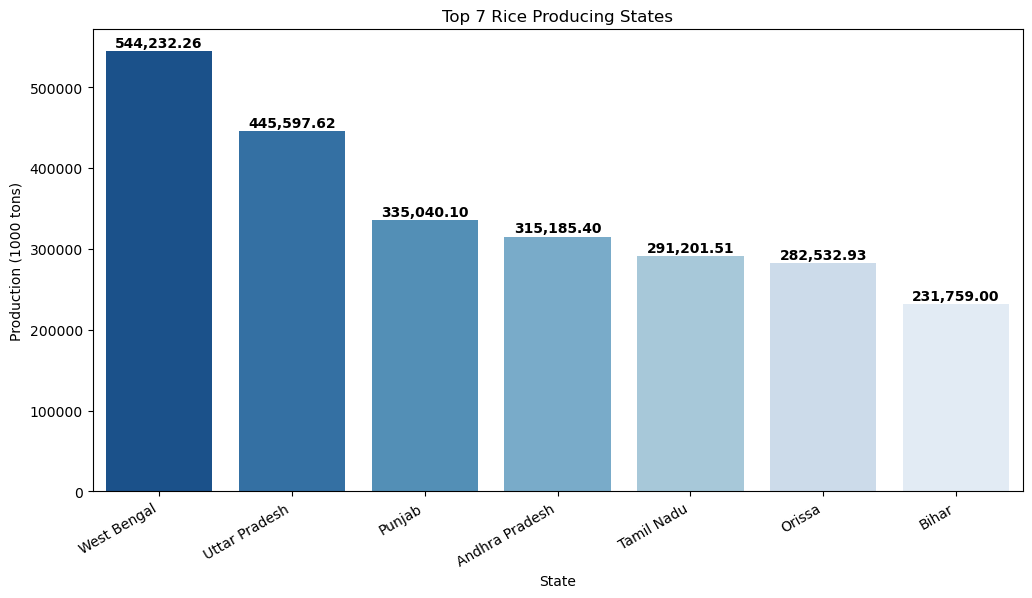

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# State mapping (state_code → state_name)
state_mapping = {
    1: "Andhra Pradesh", 2: "Bihar", 3: "Gujarat", 4: "Haryana", 5: "Karnataka",
    6: "Madhya Pradesh", 7: "Maharashtra", 8: "Orissa", 9: "Punjab", 10: "Rajasthan",
    11: "Tamil Nadu", 12: "Uttar Pradesh", 13: "West Bengal", 14: "Chhattisgarh",
    15: "Jharkhand", 16: "Uttarakhand", 17: "Assam", 18: "Himachal Pradesh",
    19: "Kerala", 20: "Telangana"
}

# Group by state and sum production for crop_id 10 (Rice)
result = df[df['crop_id'] == 10].groupby('state_code')['production_1000_tons'].sum()

# Get top 7 rice-producing states
top7_rice = result.nlargest(7)

# Convert state codes to names
state_names = [state_mapping[code] for code in top7_rice.index]

# Create DataFrame for Seaborn compatibility
plot_df = pd.DataFrame({'State': state_names, 'Production': top7_rice.values})

# Plot with updated syntax
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x="State", y="Production", hue="State", palette="Blues_r", legend=False)

# Labels
for i, value in enumerate(plot_df["Production"]):
    plt.text(i, value + 5000, f"{value:,.2f}", ha='center', fontsize=10, fontweight='bold')

plt.xlabel("State")
plt.ylabel("Production (1000 tons)")
plt.title("Top 7 Rice Producing States")
plt.xticks(rotation=30, ha="right")  # Rotate labels for readability

# Show plot
plt.show()


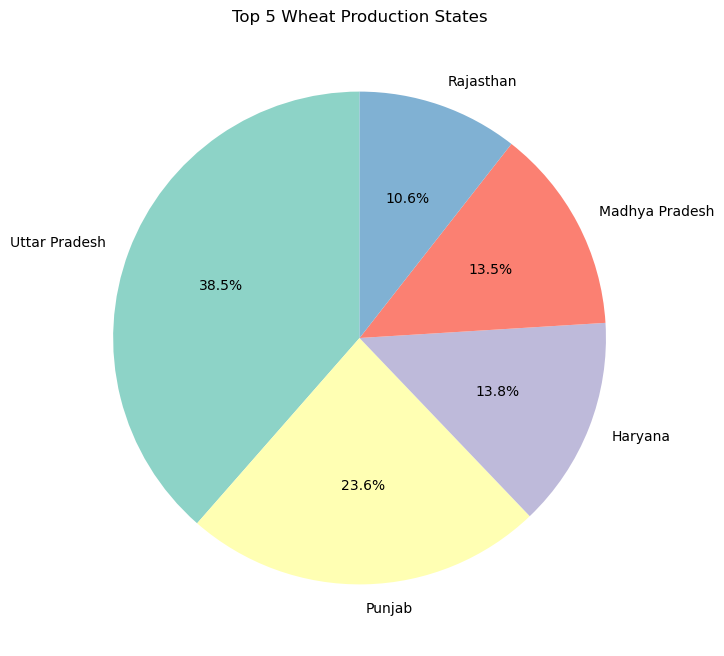

In [45]:
# Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
df.tail()
result = df[(df['crop_id'] == 18)].groupby('state_code')['production_1000_tons'].sum()
top_5wheat_states = result.nlargest(n=5)
top_5wheat_states


# State mapping (state_code → state_name)
state_mapping = {
    1: "Andhra Pradesh", 2: "Bihar", 3: "Gujarat", 4: "Haryana", 5: "Karnataka",
    6: "Madhya Pradesh", 7: "Maharashtra", 8: "Orissa", 9: "Punjab", 10: "Rajasthan",
    11: "Tamil Nadu", 12: "Uttar Pradesh", 13: "West Bengal", 14: "Chhattisgarh",
    15: "Jharkhand", 16: "Uttarakhand", 17: "Assam", 18: "Himachal Pradesh",
    19: "Kerala", 20: "Telangana"
}

# Convert state codes to names
state_names = [state_mapping[code] for code in top_5wheat_states.index]

# Create DataFrame for Seaborn compatibility
plot_df = pd.DataFrame({'State': state_names, 'Production': top_5wheat_states.values})


# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(plot_df['Production'], labels=plot_df['State'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(plot_df)))
plt.title('Top 5 Wheat Production States')
plt.show()

   state_code  total_production
5           6         153594.79
2           3         126224.01
9          10         122726.86
6           7          95567.91
0           1          76888.09


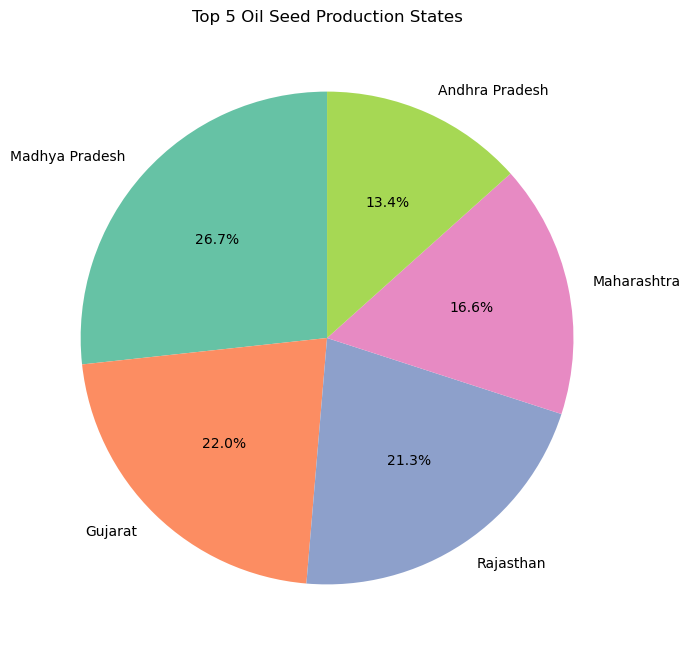

In [99]:
df.tail()
# Oil seed production by top 5 states
oil_seed_production_by_state = df[(df['crop_id']==13)].groupby('state_code')['production_1000_tons'].sum().reset_index()
oil_seed_production_by_state.rename(columns={'production_1000_tons':'total_production'},inplace=True)
top5_oil_seed_state = oil_seed_production_by_state.nlargest(5,'total_production')
print(top5_oil_seed_state)

# State mapping (state_code → state_name)
state_mapping = {
    1: "Andhra Pradesh", 2: "Bihar", 3: "Gujarat", 4: "Haryana", 5: "Karnataka",
    6: "Madhya Pradesh", 7: "Maharashtra", 8: "Orissa", 9: "Punjab", 10: "Rajasthan",
    11: "Tamil Nadu", 12: "Uttar Pradesh", 13: "West Bengal", 14: "Chhattisgarh",
    15: "Jharkhand", 16: "Uttarakhand", 17: "Assam", 18: "Himachal Pradesh",
    19: "Kerala", 20: "Telangana"
}

#apply map function to get state name
top5_oil_seed_state['state_name'] = top5_oil_seed_state['state_code'].map(state_mapping)

# Assuming 'top_5_states' is your dataframe with the top 5 states
data_values = top5_oil_seed_state['total_production']
data_labels = top5_oil_seed_state['state_name']
color_palette = sns.color_palette("Set2", len(top5_oil_seed_state))  # Using Seaborn color palette

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data_values, labels=data_labels, autopct='%1.1f%%', startangle=90, colors=color_palette)
plt.title('Top 5 Oil Seed Production States')
plt.show()

    state_code  total_production      state_name
4            5          10785.87       Karnataka
6            7           5599.46     Maharashtra
0            1           4447.78  Andhra Pradesh
17          20           1401.06       Telangana
8            9           1081.86          Punjab
10          11            762.38      Tamil Nadu
11          12            552.66   Uttar Pradesh


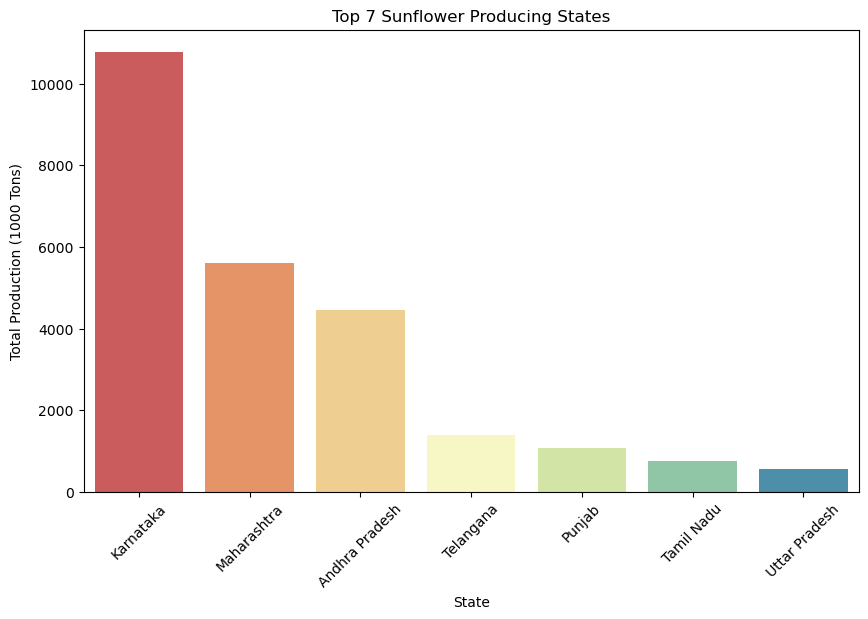

In [125]:
# Top 7 SUNFLOWER PRODUCTION  State
sunflower_production_by_state = df[(df['crop_id']==4)].groupby('state_code')['production_1000_tons'].sum().reset_index()
sunflower_production_by_state.rename(columns={'production_1000_tons':'total_production'},inplace=True)
top5_sunflower_state = sunflower_production_by_state.nlargest(7,'total_production')


# State mapping (state_code → state_name)
state_mapping = {
    1: "Andhra Pradesh", 2: "Bihar", 3: "Gujarat", 4: "Haryana", 5: "Karnataka",
    6: "Madhya Pradesh", 7: "Maharashtra", 8: "Orissa", 9: "Punjab", 10: "Rajasthan",
    11: "Tamil Nadu", 12: "Uttar Pradesh", 13: "West Bengal", 14: "Chhattisgarh",
    15: "Jharkhand", 16: "Uttarakhand", 17: "Assam", 18: "Himachal Pradesh",
    19: "Kerala", 20: "Telangana"
}

#apply map function to get state name
top5_sunflower_state['state_name'] = top5_sunflower_state['state_code'].map(state_mapping)
print(top5_sunflower_state)


data_values = top5_sunflower_state['total_production']
data_labels = top5_sunflower_state['state_name']
color_palette = sns.color_palette("Spectral", len(top5_sunflower_state))  # Using Seaborn color palette

# Plotting the pie chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_sunflower_state['state_name'], y=top5_sunflower_state['total_production'], palette="Spectral",hue = top5_sunflower_state['state_name'])

plt.xlabel("State")
plt.ylabel("Total Production (1000 Tons)")
plt.title("Top 7 Sunflower Producing States")

# Rotate Labels for Readability
plt.xticks(rotation=45)

plt.show()



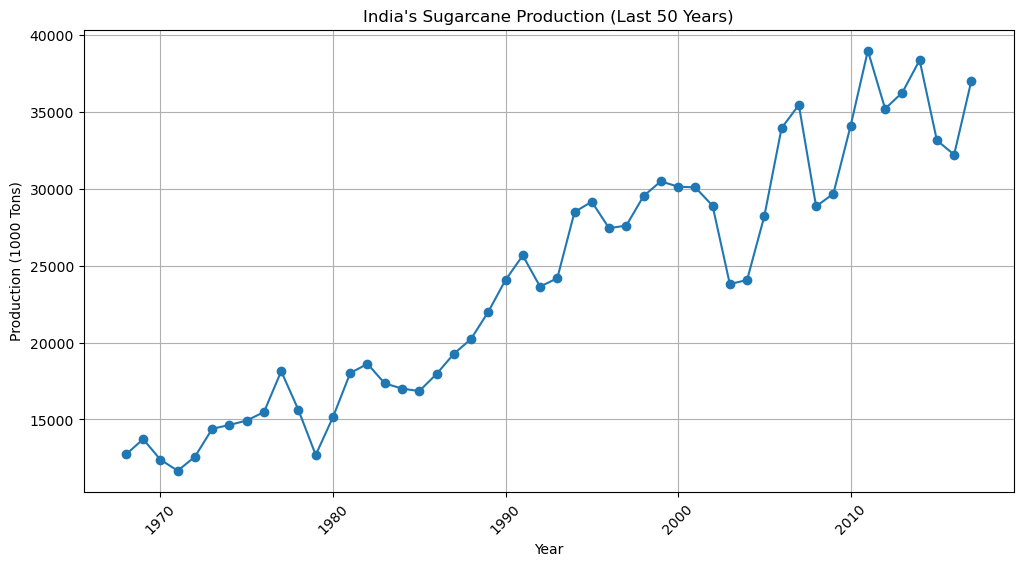

In [137]:
# India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
india_sugar_prod = df[(df['crop_id']==21)].groupby('year')['production_1000_tons'].sum().reset_index()
india_sugar_prod_50 =  india_sugar_prod.sort_values(['year'],ascending=False).head(50)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.plot(india_sugar_prod_50['year'], india_sugar_prod_50['production_1000_tons'], marker='o', linestyle='-')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Production (1000 Tons)')
plt.title("India's Sugarcane Production (Last 50 Years)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show plot
plt.show()


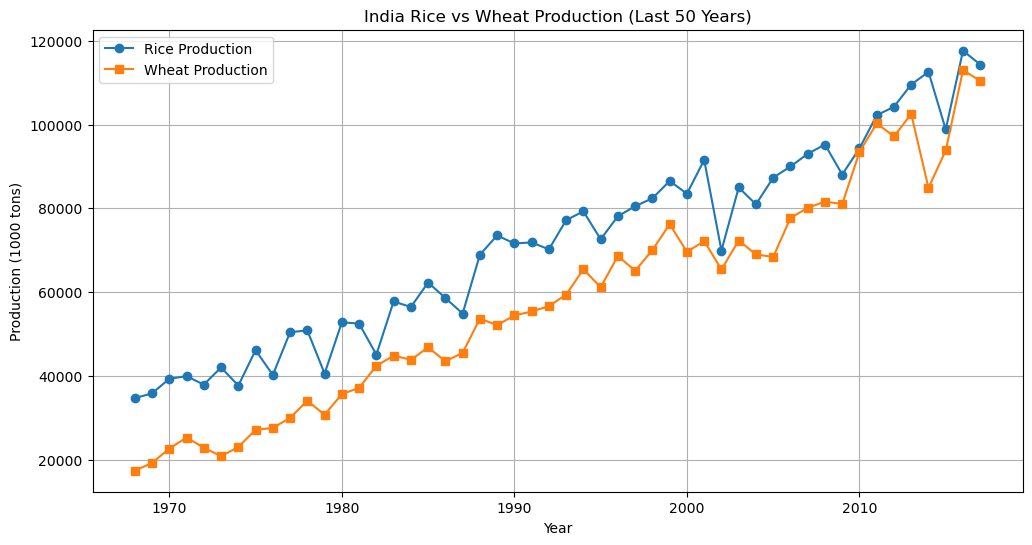

In [155]:
# India's rice PRODUCTION From Last 50 Years(Line_plot)
india_rice_prod = df[(df['crop_id']==10)].groupby('year')['production_1000_tons'].sum().reset_index()
india_rice_prod_last_50 =  india_rice_prod.sort_values(['year'],ascending=False).head(50)
india_rice_prod_last_50

# India's wheat PRODUCTION From Last 50 Years(Line_plot)
india_wheat_prod = df[(df['crop_id']==18)].groupby('year')['production_1000_tons'].sum().reset_index()
india_wheat_prod_50 =  india_wheat_prod.sort_values(['year'],ascending=False).head(50)
india_wheat_prod_50



# Plot
plt.figure(figsize=(12,6))
plt.plot(india_rice_prod_last_50['year'], india_rice_prod_last_50['production_1000_tons'], label='Rice Production', marker='o')
plt.plot(india_wheat_prod_50['year'], india_wheat_prod_50['production_1000_tons'], label='Wheat Production', marker='s')

plt.xlabel('Year')
plt.ylabel('Production (1000 tons)')
plt.title('India Rice vs Wheat Production (Last 50 Years)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Database Connection (Modify accordingly)
# Database connection details
db_user = "root"
db_password = "Tr@de2win"
db_host = "127.0.0.1"
db_name = "agri_capstone"
# Establish connection
conn = pymysql.connect(
    host=db_host,
    user=db_user,
    password=db_password
)

# Fetch data into DataFrame
query = """SELECT * FROM agri_capstone.districts 
where state_code = 13;"""
df_wb_dist_name = pd.read_sql(query, conn)

# Close connection
conn.close()

In [31]:
# -- Rice Production By West Bengal Districts
df.tail()
rice_prod_wb_by_dst = df[(df['state_code'] == 13) & (df['crop_id'] == 10)].groupby('dist_code')['production_1000_tons'].sum().reset_index()
rice_prod_wb_by_dst.rename(columns={'production_1000_tons':'total_rice_production'},inplace=True)

df_rice_prod_with_dist_name = rice_prod_wb_by_dst.merge(df_wb_dist_name,on='dist_code',how='inner')
df_rice_prod_with_dist_name.drop(columns=['state_code'],inplace=True)
df_rice_prod_with_dist_name

,dist_code,total_rice_production,dist_name
0,800,63011.99,24 Parganas
1,803,28016.30,Nadia
2,804,37261.24,Murshidabad
3,805,71422.15,Burdwan
4,806,42213.81,Birbhum
5,807,40165.20,Bankura
6,810,30962.21,Hooghly
7,811,10264.53,Howrah
8,812,17372.00,Jalpaiguri
9,813,2855.20,Darjeeling


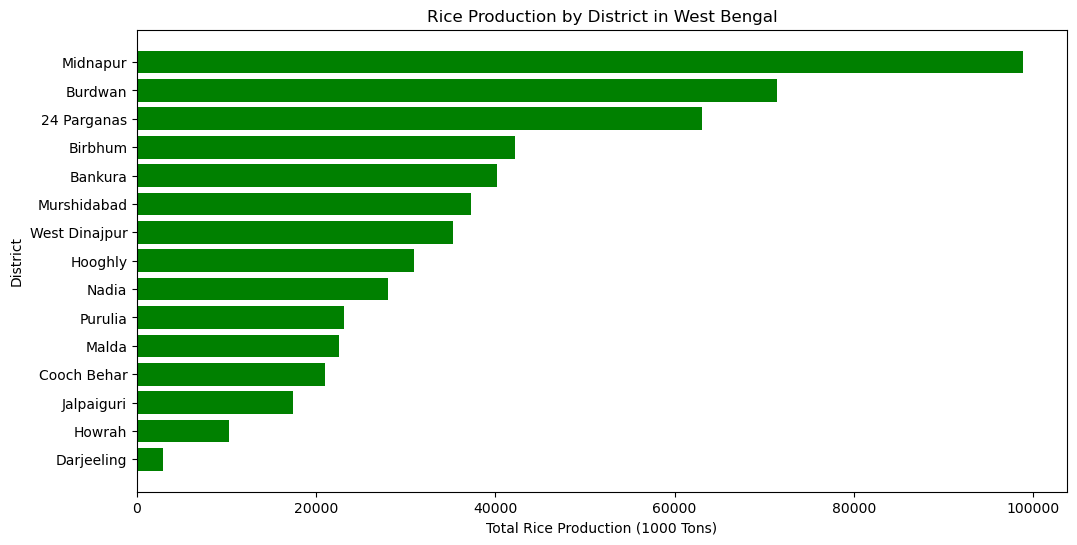

In [43]:
import matplotlib.pyplot as plt

# Sorting for better visualization
df_sorted = df_rice_prod_with_dist_name.sort_values(by='total_rice_production', ascending=False)

plt.figure(figsize=(12,6))
plt.barh(df_sorted['dist_name'], df_sorted['total_rice_production'], color='green')
plt.xlabel('Total Rice Production (1000 Tons)')
plt.ylabel('District')
plt.title('Rice Production by District in West Bengal')
plt.gca().invert_yaxis()  # To show highest production on top
plt.show()


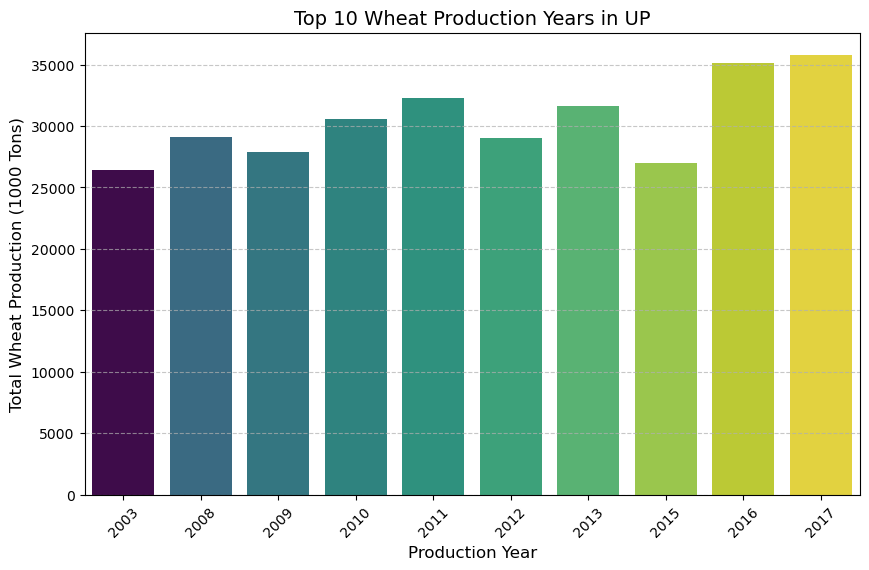

In [81]:
# Top 10 Wheat Production Years From UP
wheat_up_prod = df[(df['crop_id'] == 18) & (df['state_code'] == 12)].groupby(['production_year'])['production_1000_tons'].sum().reset_index()
wheat_up_prod.rename(columns={'production_1000_tons':'total_wheat_production'},inplace=True)
top10_wheat_up_prod=wheat_up_prod.sort_values(['total_wheat_production'],ascending=False).head(10)


#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='production_year',y='total_wheat_production',
            hue='production_year',
            data=top10_wheat_up_prod,palette="viridis",
           legend=False)


# Labels & Title
plt.xlabel("Production Year", fontsize=12)
plt.ylabel("Total Wheat Production (1000 Tons)", fontsize=12)
plt.title("Top 10 Wheat Production Years in UP", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

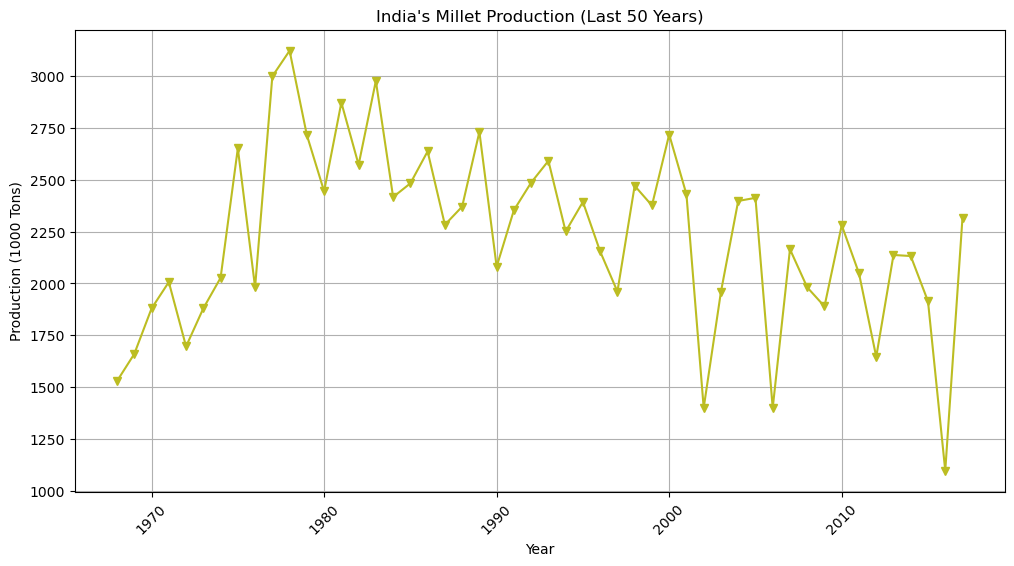

In [111]:
# India's Millet PRODUCTION From Last 50 Years(Line_plot)

india_millet_prod = df[(df['crop_id']==17)].groupby('production_year')['production_1000_tons'].sum().reset_index()
india_millet_prod
india_millet_prod_50 =  india_millet_prod.sort_values(by=['production_year'],ascending=False).head(50)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.plot(india_millet_prod_50['production_year'], india_millet_prod_50['production_1000_tons'], marker='v', linestyle='-',color='tab:olive')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Production (1000 Tons)')
plt.title("India's Millet Production (Last 50 Years)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show plot
plt.show()

In [129]:
# Database Connection (Modify accordingly)
# Database connection details
db_user = "root"
db_password = "Tr@de2win"
db_host = "127.0.0.1"
db_name = "agri_capstone"
# Establish connection
conn = pymysql.connect(
    host=db_host,
    user=db_user,
    password=db_password
)

# Fetch data into DataFrame
query = """SELECT * FROM agri_capstone.states;"""
df_state = pd.read_sql(query, conn)

# Close connection
conn.close()

C:\Users\JEEVA\AppData\Local\Temp\ipykernel_8440\1956495621.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_state = pd.read_sql(query, conn)


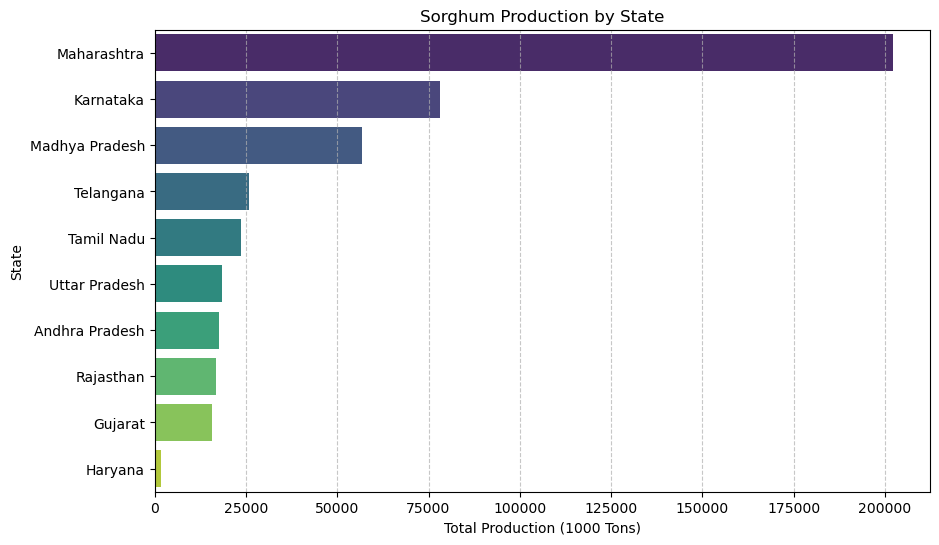

In [149]:
# Sorghum Production (Kharif and Rabi) by Region
sorghum_production_by_state = df[(df['crop_id'] == 7) | (df['crop_id'] == 16 )].groupby('state_code')['production_1000_tons'].sum().reset_index()
sorghum_production_by_state.rename(columns={'production_1000_tons':'total_production'},inplace=True)
sorghum_production_by_state.sort_values(by='total_production',ascending=False)
sorghum_production_by_state

sorghum_production = sorghum_production_by_state.merge(df_state,on='state_code',how='inner')
sorghum_production
sorghum_production.drop(columns='state_code',inplace=True)
sorghum_production.sort_values(by='total_production',ascending=False,inplace=True)
sorghum_production = sorghum_production.head(10)

# Horizontal Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=sorghum_production, y="state_name", x="total_production", palette="viridis",hue='state_name')
plt.ylabel("State")
plt.xlabel("Total Production (1000 Tons)")
plt.title("Sorghum Production by State")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()

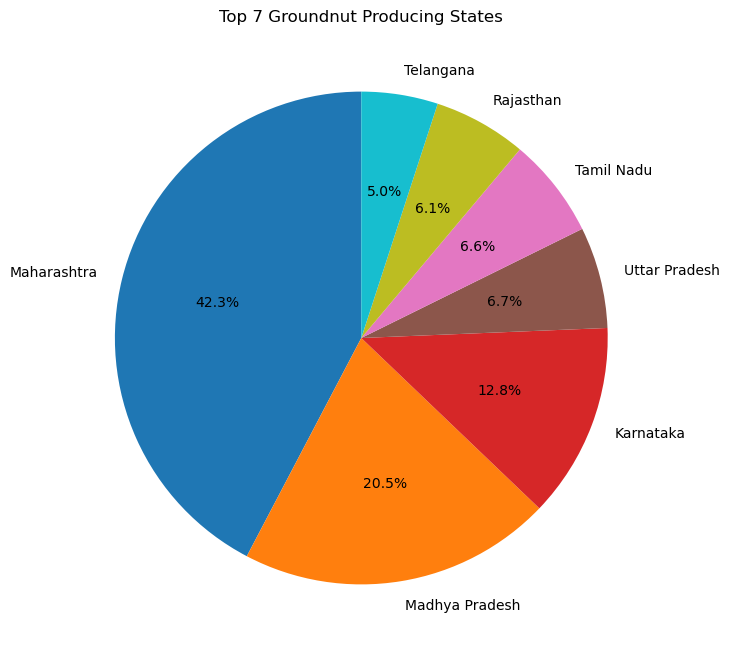

In [201]:
# -- Top 7 States for Groundnut Production

total_ground_nut_prod_df = df[(df['crop_id']==7)].groupby('state_code')['production_1000_tons'].sum().reset_index()
total_ground_nut_prod_df

top7_ground_nut_prod_state = total_ground_nut_prod_df.sort_values('production_1000_tons',ascending=False).head(7)
top7_ground_nut_prod_state
top7_ground_nut_state = top7_ground_nut_prod_state.merge(df_state,on='state_code',how='inner')
top7_ground_nut_state.drop(columns='state_code',inplace=True)
top7_ground_nut_state.rename(columns={'production_1000_tons':'total_ground_nut_production'},inplace=True)
top7_ground_nut_state

#plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

# Extract values and labels
data_values = top7_ground_nut_state['total_ground_nut_production']
data_labels = top7_ground_nut_state['state_name']

# Generate color palette
color_palette = plt.colormaps['tab10'](np.linspace(0, 1, len(data_values)))

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(data_values, labels=data_labels, autopct='%1.1f%%', startangle=90, colors=color_palette)
plt.title('Top 7 Groundnut Producing States')
plt.show()


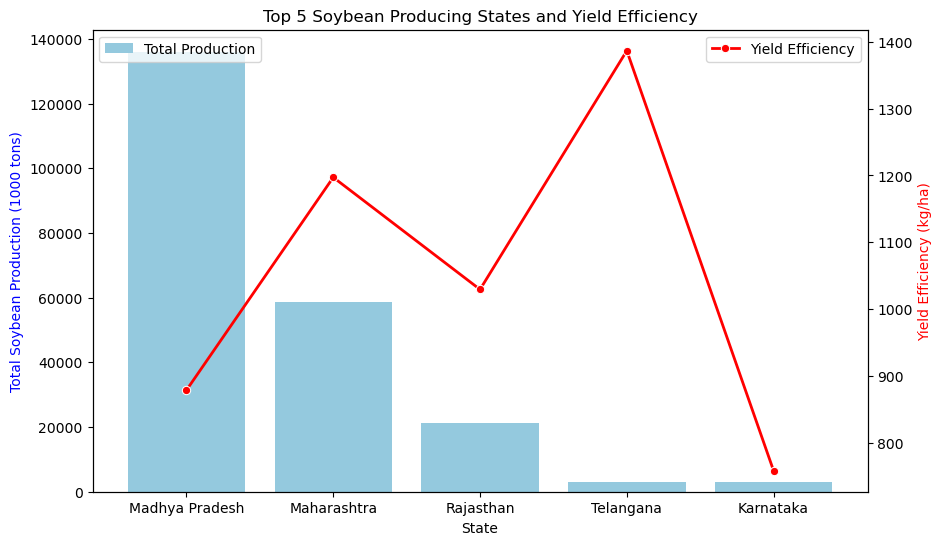

In [229]:
# Soybean Production by Top 5 States and Yield Efficiency
df.tail()
soybean_df = df[(df['crop_id']==15)].groupby('state_code').agg({'production_1000_tons':'sum','yield_kg_per_ha':'mean'})
soybean_df.sort_values('production_1000_tons',ascending=False,inplace=True)
soybean_df['yield_kg_per_ha'] = soybean_df['yield_kg_per_ha'].round(2)
soybean_df.rename(columns={'yield_kg_per_ha':'total_yield','production_1000_tons':'total_soybean_production'},inplace=True)
soybean_top5_state_df = soybean_df.head(5)
soybean_top5_state_df
soybean_top5 = soybean_top5_state_df.merge(df_state,on='state_code')
soybean_top5.drop(columns='state_code',inplace=True)
soybean_top5

import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for total soybean production
sns.barplot(x='state_name', y='total_soybean_production', data=soybean_top5, ax=ax1, color='skyblue', label='Total Production')

# Create second y-axis for yield efficiency
ax2 = ax1.twinx()
sns.lineplot(x='state_name', y='total_yield', data=soybean_top5, ax=ax2, color='red', marker='o', linewidth=2, label='Yield Efficiency')

# Labels and title
ax1.set_xlabel("State")
ax1.set_ylabel("Total Soybean Production (1000 tons)", color='blue')
ax2.set_ylabel("Yield Efficiency (kg/ha)", color='red')
plt.title("Top 5 Soybean Producing States and Yield Efficiency")

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



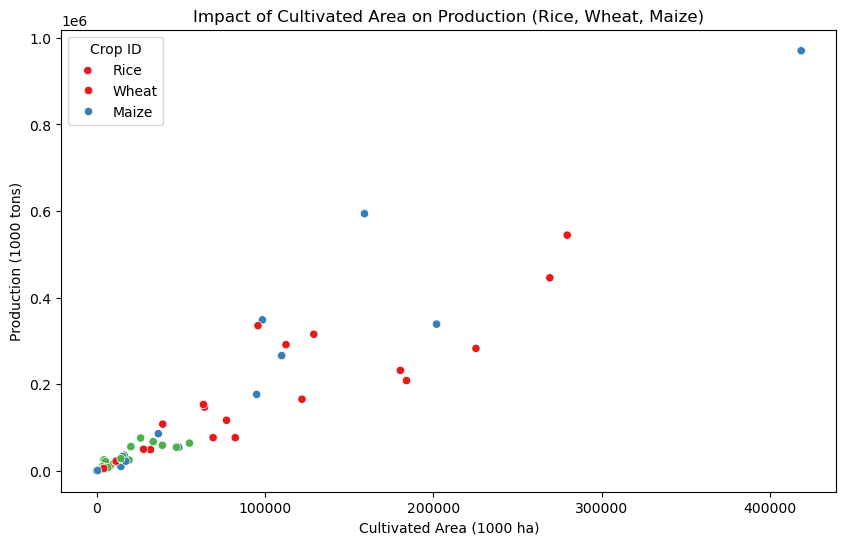

In [239]:
import pandas as pd

# Filter for Rice (1), Wheat (2), Maize (3)
df = df[df["crop_id"].isin([18, 10, 19])]


# Group by state and crop to get total cultivated area & production
statewise_data = df.groupby(["state_code", "crop_id"]).agg(
    total_area=("area_1000_ha", "sum"),
    total_production=("production_1000_tons", "sum")
).reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to analyze the relation between area cultivated and production
plt.figure(figsize=(10, 6))
sns.scatterplot(data=statewise_data, x="total_area", y="total_production", hue="crop_id", palette="Set1")
plt.xlabel("Cultivated Area (1000 ha)")
plt.ylabel("Production (1000 tons)")
plt.title("Impact of Cultivated Area on Production (Rice, Wheat, Maize)")
plt.legend(title="Crop ID", labels=["Rice", "Wheat", "Maize"])
plt.show()





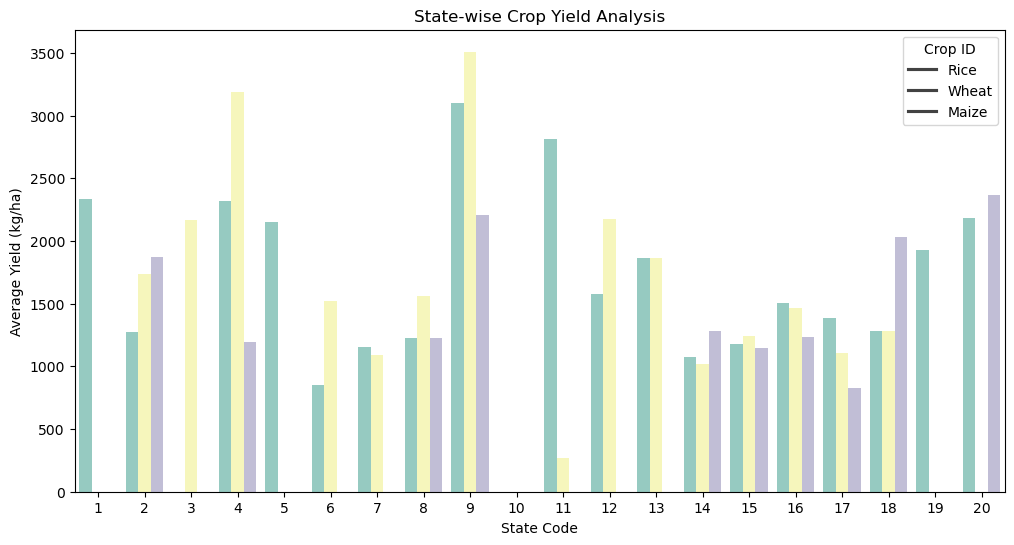

In [251]:
# Calculate Yield = (Production * 1,000,000 kg) / (Area * 1,000 ha)
df["yield_kg_per_ha"] = (df["production_1000_tons"] * 1000000) / (df["area_1000_ha"] * 1000)

# Average yield per crop across states
yield_analysis = df.groupby(["state_code", "crop_id"])["yield_kg_per_ha"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=yield_analysis, x="state_code", y="yield_kg_per_ha", hue="crop_id", palette="Set3",legend=False)
plt.xlabel("State Code")
plt.ylabel("Average Yield (kg/ha)")
plt.title("State-wise Crop Yield Analysis")
plt.legend(title="Crop ID", labels=["Rice", "Wheat", "Maize"])
plt.show()


In [284]:
# Rice vs. Wheat Yield Across States

#select crop based on id
df_rice = df[df['crop_id'] == 10].copy()
df_wheat = df[df['crop_id'] == 18].copy()


#merge with state data frame to get state name
df_rice = df_rice.merge(df_state, on='state_code', how='left')
df_wheat = df_wheat.merge(df_state, on='state_code', how='left')

import numpy as np

# Replace Inf with NaN
df_rice.loc[:, 'yield_kg_per_ha'] = df_rice['yield_kg_per_ha'].replace([np.inf, -np.inf], np.nan)
df_wheat.loc[:, 'yield_kg_per_ha'] = df_wheat['yield_kg_per_ha'].replace([np.inf, -np.inf], np.nan)

# Step 1: Fill NaN using state-wise mean
df_rice.loc[:, 'yield_kg_per_ha'] = df_rice['yield_kg_per_ha'].fillna(
    df_rice.groupby('state_code')['yield_kg_per_ha'].transform('mean')
)
df_wheat.loc[:, 'yield_kg_per_ha'] = df_wheat['yield_kg_per_ha'].fillna(
    df_wheat.groupby('state_code')['yield_kg_per_ha'].transform('mean')
)

# Step 2: Fill remaining NaNs using crop-wise mean (Wheat only)
df_wheat.loc[:, 'yield_kg_per_ha'] = df_wheat['yield_kg_per_ha'].fillna(df_wheat['yield_kg_per_ha'].mean())




0


In [286]:
import pandas as pd
import numpy as np

# Extract Rice and Wheat DataFrames
df_rice = df[df['crop_id'] == 10].copy()  # Crop ID 10 -> Rice
df_wheat = df[df['crop_id'] == 18].copy()  # Crop ID 18 -> Wheat

# Step 1: Replace Inf values with NaN
df_rice.loc[:, 'yield_kg_per_ha'] = df_rice['yield_kg_per_ha'].replace([np.inf, -np.inf], np.nan)
df_wheat.loc[:, 'yield_kg_per_ha'] = df_wheat['yield_kg_per_ha'].replace([np.inf, -np.inf], np.nan)

# Step 2: Fill NaN values using State-wise Mean
df_rice.loc[:, 'yield_kg_per_ha'] = df_rice['yield_kg_per_ha'].fillna(
    df_rice.groupby('state_code')['yield_kg_per_ha'].transform('mean')
)
df_wheat.loc[:, 'yield_kg_per_ha'] = df_wheat['yield_kg_per_ha'].fillna(
    df_wheat.groupby('state_code')['yield_kg_per_ha'].transform('mean')
)

# Step 3: Fill remaining NaNs with Crop-level Mean
df_rice.loc[:, 'yield_kg_per_ha'] = df_rice['yield_kg_per_ha'].fillna(df_rice['yield_kg_per_ha'].mean())
df_wheat.loc[:, 'yield_kg_per_ha'] = df_wheat['yield_kg_per_ha'].fillna(df_wheat['yield_kg_per_ha'].mean())

# Step 4: Final Verification
print("NaN count after cleaning:")
print("Rice Yield:", df_rice['yield_kg_per_ha'].isna().sum())  # Should be 0
print("Wheat Yield:", df_wheat['yield_kg_per_ha'].isna().sum())  # Should be 0


NaN count after cleaning:
Rice Yield: 0
Wheat Yield: 0
